In [1]:
# import PyTorch and its related packages
import torch as T
import pandas as pd
import hepytorch as hep
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
num_inputs = 2
num_outputs = 1
num_examples = 10000
dtype = T.float

device = 'cuda' if T.cuda.is_available() else 'cpu'

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = T.randn(num_examples, num_inputs, device=device, dtype=dtype)
noise = .1 * T.randn(num_examples, device=device, dtype=dtype)
Y = (real_fn(X) + noise).view(-1, 1)

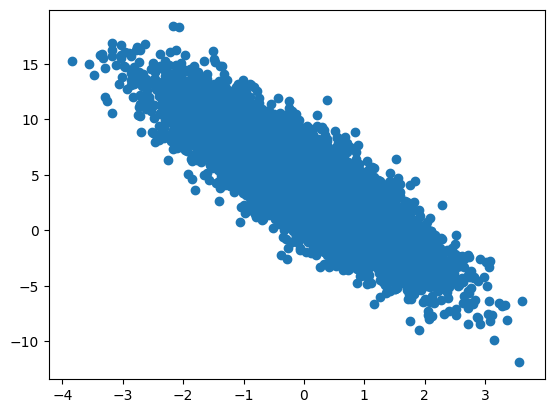

In [3]:
plt.scatter(X[:, 1].cpu().numpy(), Y.cpu().numpy())
plt.show()

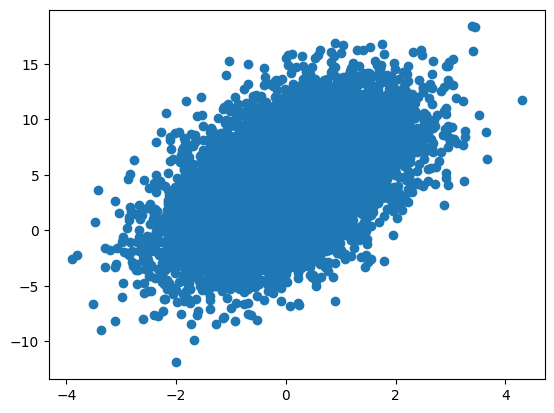

In [4]:
plt.scatter(X[:, 0].cpu().numpy(), Y.cpu().numpy())
plt.show()

In [5]:
# define dataframe for the dataset
x = X.cpu().numpy()
y = Y.cpu().numpy()
x.shape, y.shape
#df = pd.DataFrame({'x1': x[:, 0], 'x2': x[:, 1], 'y': y[:, 0]})
#df.to_csv('./data/linear_regression_data.csv', index=False)
#df.head()

((10000, 2), (10000, 1))

In [19]:
class LinearDataset(Dataset):
    def __init__(self, X, y):
        assert X.size()[0] == y.size()[0]
        self.X = X
        self.y = y
    
    def __len__(self):
        return X.size()[0]
    
    def __getitem__(self, idx):
        return [X[idx], y[idx]]

In [20]:
batch_size = 4
X.size(), Y.size()
train_data = DataLoader(LinearDataset(X, Y), batch_size=batch_size, shuffle=True)

In [21]:
myHEP.model.to(myHEP.device)
epochs = 10
num_batches = num_examples / batch_size
losses = []

for e in range(epochs):
    cumulative_loss = 0
    # inner loop
    for i, (data, label) in enumerate(train_data):
        data = data.to(myHEP.device)
        label = label.to(myHEP.device)
        
        yhat = myHEP.model(data)
        loss = myHEP.loss_fn(yhat, label)
        myHEP.optimizer.zero_grad()
        loss.backward()
        myHEP.optimizer.step()
        cumulative_loss += loss.item()
    print("Epoch %s, loss: %s" % (e, cumulative_loss / num_examples))
    losses.append(cumulative_loss / num_examples)

Epoch 0, loss: 2.0195740584015844
Epoch 1, loss: 0.7332096905458718
Epoch 2, loss: 0.2672229607118294
Epoch 3, loss: 0.09841102467812597
Epoch 4, loss: 0.03724832985625253
Epoch 5, loss: 0.01508057330987649
Epoch 6, loss: 0.007038954457384534
Epoch 7, loss: 0.004120936201924633
Epoch 8, loss: 0.0030629903688910417
Epoch 9, loss: 0.0026786526373558444


In [6]:
myHEP = hep.HEPTorch('/Users/i550012/study/hepytorch/examples/recipes/linear_regression.json')

In [8]:
result = myHEP.train()

/Users/i550012/virtualenv/hep-pytorch/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, loss: 1.5610436972618102
Epoch 1, loss: 1.5635035185575485
Epoch 2, loss: 1.5626606083393098
Epoch 3, loss: 1.5610556530237198
Epoch 4, loss: 1.5637913495540618
Epoch 5, loss: 1.5611731141924858
Epoch 6, loss: 1.5633614404678344
Epoch 7, loss: 1.561381862926483
Epoch 8, loss: 1.5614086737036705
Epoch 9, loss: 1.5614854344129563
Epoch 10, loss: 1.562087410545349
Epoch 11, loss: 1.5613853815913201
Epoch 12, loss: 1.5624698103785515
Epoch 13, loss: 1.560843541121483
Epoch 14, loss: 1.5608499943971634
Epoch 15, loss: 1.5618723130702972
Epoch 16, loss: 1.5620632512807846
Epoch 17, loss: 1.563027167570591
Epoch 18, loss: 1.5622622670650481
Epoch 19, loss: 1.5631238237857819
Epoch 20, loss: 1.5616973064780235
Epoch 21, loss: 1.5600295500993728
Epoch 22, loss: 1.5634454404115676
Epoch 23, loss: 1.5623246005773543
Epoch 24, loss: 1.5608184861898422
Epoch 25, loss: 1.5612029315233231
Epoch 26, loss: 1.5624969119787215
Epoch 27, loss: 1.5601555815339088
Epoch 28, loss: 1.561725875389576


In [9]:
losses = result['losses']
print(losses)

[2.8015832856178284, 2.391535755109787, 2.1166870161533358, 1.9341672360658646, 1.8130901965379715, 1.7291232587337493, 1.673695523738861, 1.6372291761159896, 1.6124095936179161, 1.5954723997354507, 1.5848503700017929, 1.5774416969537735, 1.5738691108584404, 1.568057184946537, 1.5629772298812865, 1.5640564507246018, 1.563878700375557, 1.5624497853755952, 1.5623705477237702, 1.5634932004451751, 1.5609256841659547, 1.5635641731977463, 1.5589506042003631, 1.5645495729207992, 1.5609976873874665, 1.5604232029676437, 1.5593079884767533, 1.562397179532051, 1.5619087432265282, 1.5633719631671905]


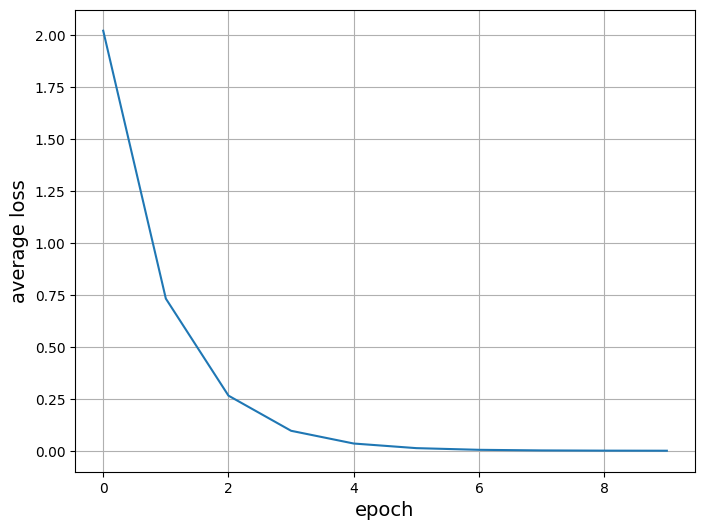

In [22]:
plt.figure(num=None, figsize=(8, 6))
plt.plot(losses)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch', fontsize=14)
plt.ylabel('average loss', fontsize=14)
plt.show()

In [25]:
params = myHEP.model.parameters()
print('The type of "params" is a ', type(params))

for name, param in myHEP.model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

The type of "params" is a  <class 'generator'>
dense_1.weight tensor([[ 1.9882, -3.3804]])
dense_1.bias tensor([4.1974])


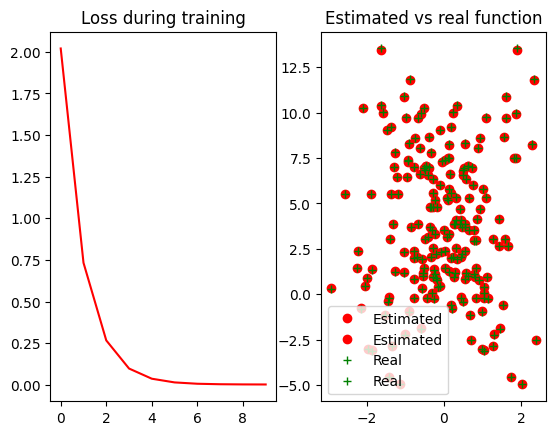

In [26]:
############################################
#    Script to plot the losses over time
############################################
def plot(model, losses, X, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size].cpu().detach().numpy(),
             model(X[:sample_size, :]).cpu().detach().numpy(), 'or', label='Estimated')
    fg2.plot(X[:sample_size].cpu().detach().numpy(),
             real_fn(X[:sample_size, :]).cpu().detach().numpy(), '+g', label='Real')
    fg2.legend()

    plt.show()

            
plot( myHEP.model, losses, X)
